In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Average (Mean) ##

In [2]:
values = make_array(2, 3, 3, 9)

In [3]:
# You could calculate the long way
sum(values)/len(values)

4.25

In [4]:
# You can use a numpy function
np.average(values)

4.25

In [5]:
# You can use a numpy function
np.mean(values)


4.25

In [6]:
# You could even type out your data, but that's probably not wise.
(2+3+3+9)/4

4.25

In [7]:
values_table = Table().with_columns('value', values)
values_table

value
2
3
3
9


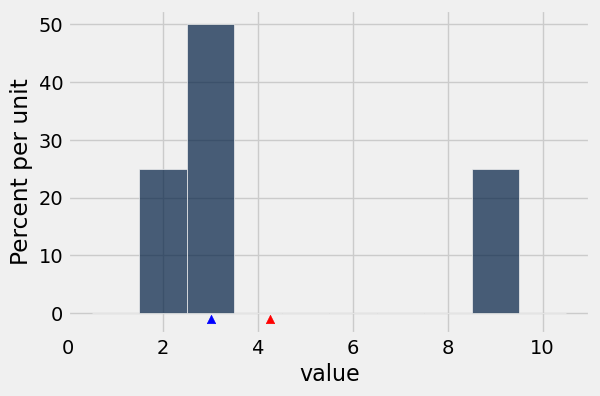

In [8]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist(0, bins = bins_for_display)
plots.scatter(np.mean(values),-1e-2,color="red", marker="^", zorder=2);
plots.scatter(percentile(50, values),-1e-2,color="blue", marker="^", zorder=2);

### Discussion Question

In [9]:
nba = Table.read_table('data/nba2013.csv')
nba

Name,Position,Height,Weight,Age in 2013
DeQuan Jones,Guard,80,221,23
Darius Miller,Guard,80,235,23
Trevor Ariza,Guard,80,210,28
James Jones,Guard,80,215,32
Wesley Johnson,Guard,79,215,26
Klay Thompson,Guard,79,205,23
Thabo Sefolosha,Guard,79,215,29
Chase Budinger,Guard,79,218,25
Kevin Martin,Guard,79,185,30
Evan Fournier,Guard,79,206,20


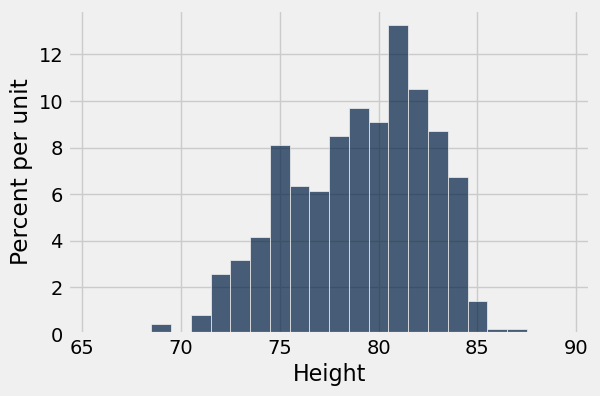

In [10]:
nba.hist('Height', bins=np.arange(65.5, 90.5))

In [11]:
# Find the median height
heights=nba.column('Height')
percentile(50, heights)

80

In [12]:
# Find the average height
np.average(heights)

79.065346534653472

## Standard Deviation ##

In [13]:
sd_table = Table().with_columns('Value', values)
sd_table

Value
2
3
3
9


In [14]:
average_value = np.average(sd_table.column(0))
average_value

4.25

In [15]:
deviations = values - average_value
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

Value,Deviation
2,-2.25
3,-1.25
3,-1.25
9,4.75


In [16]:
sum(deviations)

0.0

In [17]:
sd_table = sd_table.with_columns('Squared Deviation', deviations ** 2)
sd_table

Value,Deviation,Squared Deviation
2,-2.25,5.0625
3,-1.25,1.5625
3,-1.25,1.5625
9,4.75,22.5625


In [18]:
# Variance of the data

variance = np.mean(sd_table.column('Squared Deviation'))
variance

7.6875

In [19]:
# Standard Deviation (SD) is the square root of the variance
sd=variance**.5
sd

2.7726341266023544

In [20]:
#built in feature that will do this for us.
np.std(values)

2.7726341266023544

## Chebyshev's Bounds

In [21]:
births = Table.read_table('data/baby.csv').drop('Maternal Smoker')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight
120,284,27,62,100
113,282,33,64,135
128,279,28,64,115


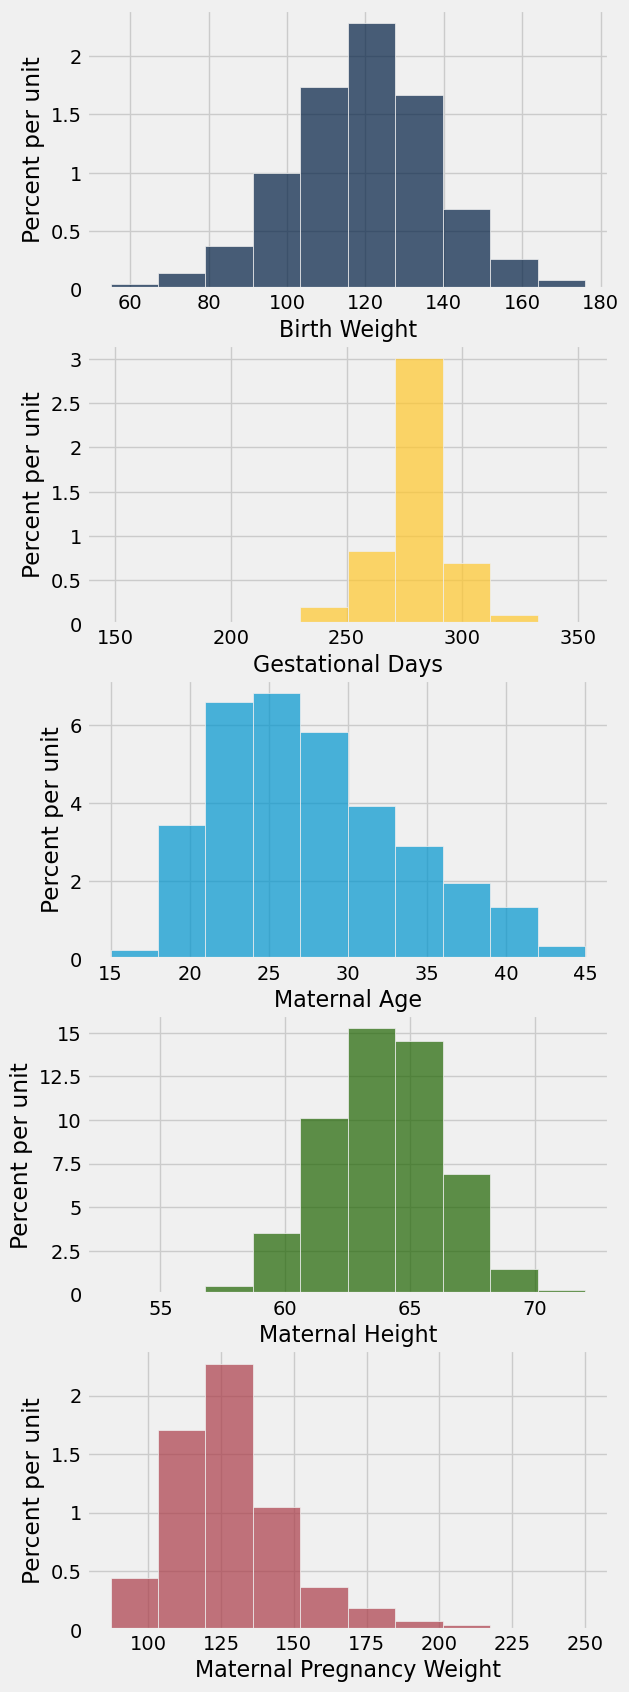

In [22]:
births.hist(overlay = False)

In [23]:
mpw = births.column('Maternal Pregnancy Weight')
mean = np.mean(mpw)
sd = np.std(mpw)
mean, sd

(128.4787052810903, 20.725449704280411)

In [24]:
within_3_SDs = births.where('Maternal Pregnancy Weight', are.between(mean - 3*sd, mean + 3*sd))

In [25]:
# Proportion within 3 SDs of the mean

within_3_SDs.num_rows / births.num_rows

0.9863713798977853

In [ ]:
# Chebyshev's bound: 
# The proportion we calculated above should be at least

1 - 1/(3**2)

In [ ]:
births.labels

In [ ]:
# See if Chebyshev's bounds work for distributions with various shapes

for feature in births.labels:
    values = births.column(feature)
    mean = np.mean(values)
    sd = np.std(values)
    print()
    print(feature)
    for z in make_array(2, 3, 4, 5):
        chosen = births.where(feature, are.between(mean - z*sd, mean + z*sd))
        proportion = chosen.num_rows / births.num_rows
        percent = round(proportion * 100, 2)
        print('Average plus or minus', z, 'SDs:', percent, '% of the data')